In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # We only take the first two features
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.8393
Test set accuracy: 0.7632


In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, ax,
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^'), legend='auto'):
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.sca(ax)
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k', legend=legend)
    
    if feature_names:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])

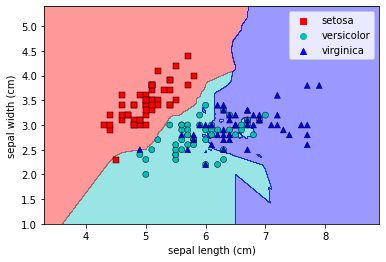

In [7]:
plot_decision_boundaries(clf, X, y, iris.feature_names, iris.target_names, plt.gca())
plt.savefig('figures/iris_5_neighbors.pdf')

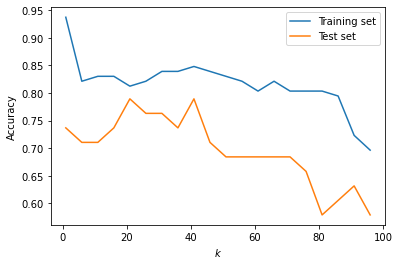

In [8]:
n_neighbors, train_scores, test_scores = [], [], []

for k in range(1, 100, 5):
    n_neighbors.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)    
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors, train_scores, label='Training set')
plt.plot(n_neighbors, test_scores, label='Test set')

plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('figures/changing_k_accuracy.pdf')

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 100)
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'n_neighbors': 39}


C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.75968379 0.72332016 0.75928854 0.75059289 0.76837945 0.77786561
 0.79525692 0.77786561 0.79525692 0.78656126 0.80434783 0.80434783
 0.80395257 0.81304348 0.81264822 0.81304348 0.81264822 0.81264822
 0.81264822 0.81304348 0.82173913 0.82173913 0.82173913 0.81304348
 0.82173913 0.81343874 0.82213439 0.82213439 0.82252964 0.82252964
 0.82252964 0.81383399 0.81343874 0.80434783 0.81343874 0.82213439
 0.82173913 0.83083004 0.83992095 0.83952569 0.83992095 0.81343874
 0.81343874 0.80474308 0.80474308 0.80434783 0.80434783 0.79565217
 0.81304348 0.81304348 0.82173913 0.82173913 0.83083004 0.81343874
 0.81343874 0.83083004 0.82173913 0.79525692 0.79525692 0.78616601
 0.79486166 0.78577075 0.7944664  0.7944664  0.80355731 0.78537549
 0.78537549 0.7944664  0.76798419 0.75889328 0.73280632 0.71501976
 0.72450593 0.72450593 0.73320158 0.71501976 0.733201

In [10]:
print(f'Training set accuracy: {grid.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {grid.score(X_test, y_test):.4f}')

Training set accuracy: 0.8482
Test set accuracy: 0.7632


k = 2: test accuracy = 0.7632
k = 5: test accuracy = 0.7632
k = 10: test accuracy = 0.7368
k = 40: test accuracy = 0.7632


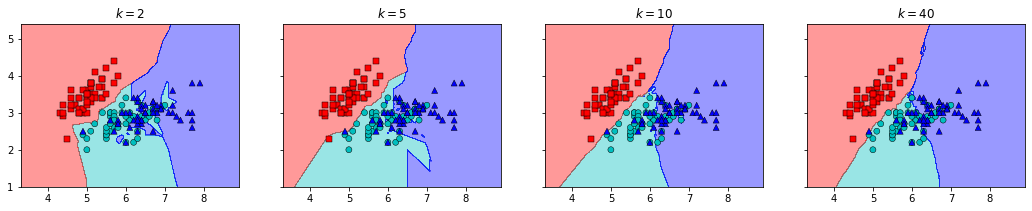

In [11]:
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(18, 3))
k_arr = [2, 5, 10, 40]

for ax, k in zip(axes.flat, k_arr):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print(f'k = {k}: test accuracy = {test_score:.4f}')
    plot_decision_boundaries(clf, X, y, [], iris.target_names, ax, legend=False)
    plt.title(f'$k = {k}$')
    
plt.savefig('figures/changing_k_decision_boundaries.pdf')